# Practice 4 
# abolfazl kalantarzadeh 

<div dir="rtl">
    خب، حالا که هم شبکه های عصبی عادی و هم شبکه های عصبی کانولوشنی رو یاد گرفتید میخوایم بریم که چند تا شبکه ترین کنیم که ببینیم چه نتایجی رو کسب می کنیم

# CIFAR Dataset

<div dir="auto">
دیتاست cifar دو ورژن داره، cifar 10 و cifar 100 یه سرچ ریز بزنید ببینید تفاوتاشون چیه اصلا
برای این که خیلیم دور نرید اینم لینکاش =)

https://keras.io/api/datasets/cifar10/
https://keras.io/api/datasets/cifar100/

<div dir="auto">
    با استفاده از دستورات و دیتاست های موجود در keras 
    ابتدا دیتاست cifar10 رو لود کنید

<div dir="auto">
    بعدش هم کتابخونه هایی که نیازتون میشه رو ایمپورت کنید، چیا هستن؟

In [27]:
import numpy as np 
from tensorflow import keras
import matplotlib.pyplot as plt 
from keras.utils import to_categorical
from keras.datasets import cifar10 


<div dir="auto">
    داده های تست و ترین رو به همراه لیبل هاشون لود کنید

In [28]:
(data_train, label_train), (data_test, label_test) = cifar10.load_data() 

<div dir="auto">
    شيپ کلی دیتاستتون رو پرینت کنید که ببینید چه تعداد عکس ترین و چه تعداد عکس تست دارید همچنین شکل لیبل هاتون رو ببینید چطوریه

In [29]:
print(data_train.shape)
print(data_test.shape)
print(label_train.shape)
print(label_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


<div dir="auto">
    با استفاده از متپلات لیب ، یکی از عکس های دیتاستتون رو نمایش بدین که یه شکل کلی دستتون بیاد که دیتاستتون شامل چیا هستش

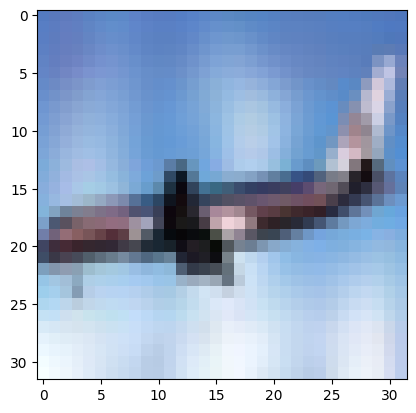

In [30]:
plt.imshow(data_train[213])

# ANN

<div dir="auto">
در این مرحله میخوایم که یک ANN 
    روی تصاویر دیتاست cifar فیت کنیم. منتهی قبلش نیاز داریم که چند تا کار انجام بدیم روی داده ها!

<div dir="auto">
    اول از همه، روی خود تصاویر چه تغییری باید انجام بدیم؟ اولا میخوایم مقادیر پیکسل ها بین 0 تا 1 باشه بعدشم باید تصاویر طوری باشند که قابل ورودی دادن به شبکه ی ANN باشند
    پس باید چیکار کنیم؟

<div dir="auto">
    یه نکته ی خیلی مهم: داده هاتون رنگین! یعنی چی؟ یعنی 3 تا کانال دارن! یعنی چی؟ یعنی وقتی دارید شیپ هارو تغییر میدید بیشتر دقت کنید!

In [31]:
data_train_final = data_train.reshape(50000 , 3072 ) 
data_test_final = data_test.reshape(10000 , 3072 ) 
data_test_final = data_test_final / 255 
data_test_final = data_test_final / 255 

<div dir="auto">
    برای این که مطمئن بشید که دیتاتون به اون صورتیه میخواید، شیپ هاشون رو پرینت بکنید

In [32]:
print( data_train_final.shape)
print( data_test_final.shape)

#Expected Output : 
# (50000,3072)
# (10000,3072)

(50000, 3072)
(10000, 3072)


<div dir="auto">
حالا باید فرمت لیبل ها به اون صورتی باشه که خروجی شبکه مون هست! یعنی 10 تایی
پس با استفاده از تابع
to_categorical
از کراس لیبل های مطلوب رو بسازید

In [33]:
label_train_cat = to_categorical(label_train , num_classes = 10 ) 
label_test_cat = to_categorical(label_test , num_classes = 10 ) 

In [34]:
print(label_test_cat.shape)
print(label_train_cat.shape)

(10000, 10)
(50000, 10)


<div dir="auto">
حالا باید مدلتون رو بسازید
اول از همه اون کلاس ها و توابع و لایه هایی که نیاز دارید رو ایمپورت کنید

In [35]:
from keras.layers import Input , Dense 
from keras.models import Sequential

<div dir="auto">
حالا مدلتون رو بسازید

    1. مدلتون رو به صورت Sequential بسازید
    2. لایه ی اولیه رو لایه ی Input قرار بدید و شکل ورودی رو براش مشخص کنید
    3. بعد لایه های Dense به به ترتیب با تعداد نود های 512و512و1024و10 قرار بدید و اکتیویشن های مناسب رو برای هر کدوم قرار بدید

In [36]:
model = Sequential() 
model.add(Input((32*32*3 , ) ))
model.add(Dense(512 , activation = 'relu'))
model.add(Dense(512 , activation= 'relu'))
model.add(Dense(1024 , activation= 'relu'))
model.add(Dense(10 , activation= 'softmax'))


<div dir="auto">
مدلتون رو کامپایل کنید
تابع هزینه تون رو categorical_crossentropy قرار بدید و از اپتیمایزر adam استفاده کنید
    
    همچنین از متریک accuracy استفاده کنید که نتایج شبکه تون براتون ملموس تر باشه

In [37]:
model.compile(loss='categorical_crossentropy' , optimizer='adam' , metrics = ['accuracy']) 

<div dir="auto">
خلاصه ی مدلتون رو نگاه کنید
چه تعداد پارامتر دارید؟

In [38]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,371,594 (9.05 MB)

 Trainable params: 2,371,594 (9.05 MB)

 Non-trainable params: 0 (0.00 B)

<div dir="auto">
مدلتون رو روی دیتاهایی که آماده کردید فیت کنید، از آرگومان های زیر استفاده کنید.
batch_size = 128
epochs = 30
داده های ولیدیشن هم یادتون نره! شما میخواید نتیجه ی مدلتون روی دیتاست test خوب باشه پس اونم باید توی آموزش در نظر بگیرید

In [39]:
model.fit(data_train_final , label_train_cat , epochs=30 , batch_size=128 , validation_split = 0.2 )

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1821 - loss: 105.3766 - val_accuracy: 0.2881 - val_loss: 2.0034
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3005 - loss: 1.9863 - val_accuracy: 0.3221 - val_loss: 1.9224
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3354 - loss: 1.8589 - val_accuracy: 0.3228 - val_loss: 1.9419
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3447 - loss: 1.8448 - val_accuracy: 0.3439 - val_loss: 1.8349
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3436 - loss: 1.8509 - val_accuracy: 0.3647 - val_loss: 1.7840
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3501 - loss: 1.8211 - val_accuracy: 0.3484 - val_loss: 1.8626
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3634 - loss: 1.7959 - val_accuracy: 0.3381 - val_loss: 1.8102
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3716 - loss: 1.7561 - val_accuracy: 

<div dir="auto">
    موفق باشید

In [40]:
model.evaluate(data_test_final , label_test_cat) 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1036 - loss: 2.5709


[2.571622133255005, 0.10000000149011612]